<h1>Dengue Data Analysis</h1>

<h3>Analyst: Remojo Mary Angela</h3>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv("dengue.csv")
df

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


<h1>1. Which year recorded the highest number of dengue cases?</h1>

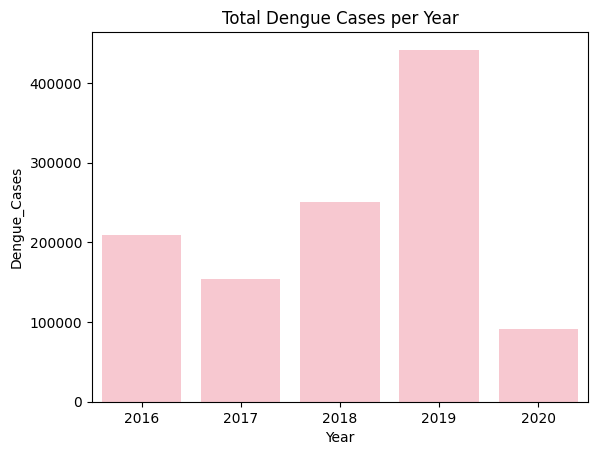

In [14]:
yearly_cases = df.groupby('Year')['Dengue_Cases'].sum().reset_index()

sns.barplot(data=yearly_cases, x='Year', y='Dengue_Cases', color='pink')
plt.title("Total Dengue Cases per Year")
plt.show()


<h3>Insight: The year that has the higher cases of dengue is year 2019. This is most likely becuase of the COVID19 outbreak and weather changes.</h3>

<h1>2. How do dengue deaths compare per year?</h1>

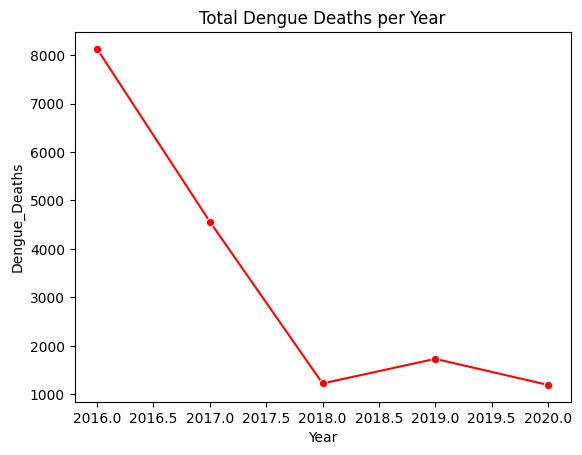

In [15]:
yearly_deaths = df.groupby('Year')['Dengue_Deaths'].sum().reset_index()

sns.lineplot(data=yearly_deaths, x='Year', y='Dengue_Deaths', marker='o', color='red')
plt.title("Total Dengue Deaths per Year")
plt.show()


<h3>Insight: We can see years where deaths peaked align closely with case surges, but not always. That suggests better treatment or awareness may have reduced fatality rates in certain years.</h3>

<h1>3. Which region had the highest dengue cases overall?</h1>

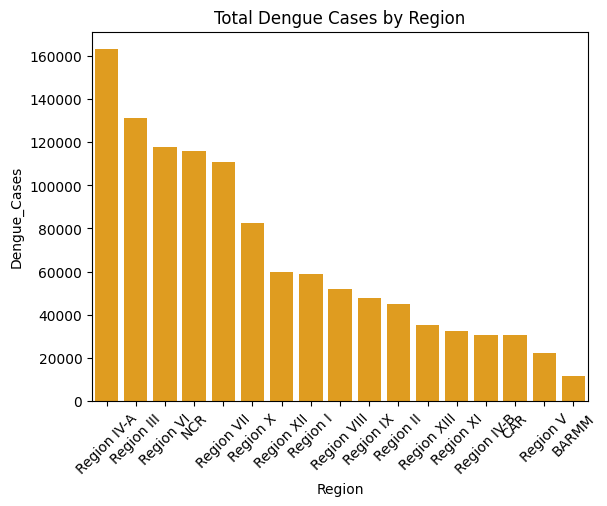

In [17]:
region_cases = df.groupby('Region')['Dengue_Cases'].sum().reset_index().sort_values(by='Dengue_Cases', ascending=False)

sns.barplot(data=region_cases, x='Region', y='Dengue_Cases', color='orange')
plt.title("Total Dengue Cases by Region")
plt.xticks(rotation=45)
plt.show()


<h3>Insight: Some regions are clearly more affected than others. This might be because of population density, poor drainage systems, or areas where mosquitoes breed easily.</h3>

<h1>4. What’s the monthly pattern of dengue cases across all years?</h1>

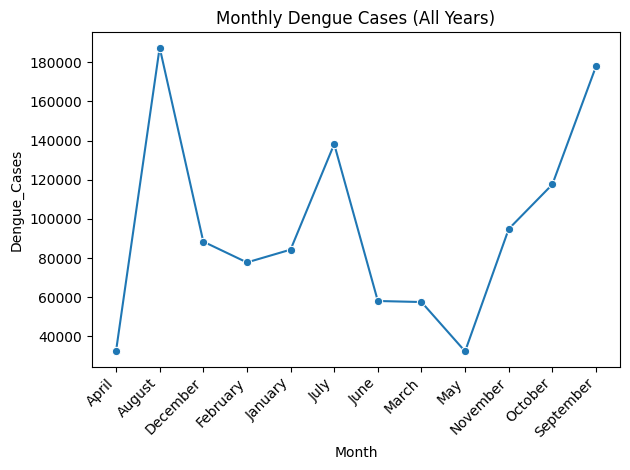

In [23]:
monthly_cases = df.groupby('Month')['Dengue_Cases'].sum().reset_index()

sns.lineplot(data=monthly_cases, x='Month', y='Dengue_Cases', marker='o')
plt.title("Monthly Dengue Cases (All Years)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<h3>Insight: The graph shows that dengue cases often rise during certain months, it's probably because of the rainy season. It makes sense because stagnant water is perfect for mosquito breeding.</h3>

<h1>5. How are dengue cases distributed between regions?</h1>

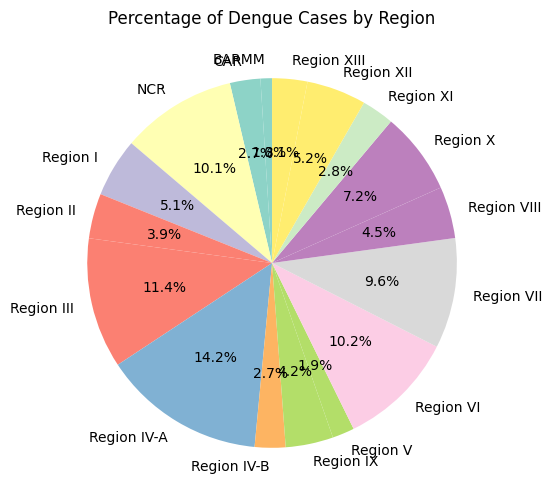

In [26]:
region_sum = df.groupby('Region')['Dengue_Cases'].sum()
region_sum.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='Set3', figsize=(6,6))
plt.title("Percentage of Dengue Cases by Region")
plt.ylabel("")
plt.show()


<h3>Insight: The pie chart helps me see which regions are the most affected overall. A few areas take up most of the chart, meaning they’re hotspots for dengue.</h3>

<h1>6. How do dengue deaths compare across regions?</h1>

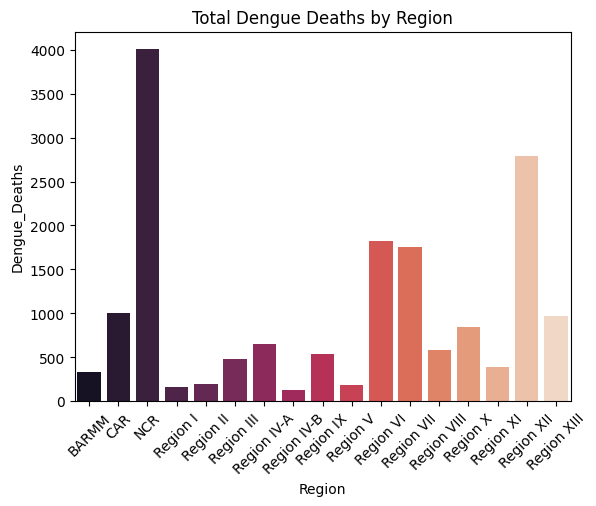

In [27]:
region_deaths = df.groupby('Region')['Dengue_Deaths'].sum().reset_index()

sns.barplot(data=region_deaths, x='Region', y='Dengue_Deaths', palette='rocket')
plt.title("Total Dengue Deaths by Region")
plt.xticks(rotation=45)
plt.show()


<h3>Insight: Some regions not only have a lot of cases, but also high death counts. This might mean healthcare services in those areas need more support during outbreaks.</h3>

<h1>7. Is there a relationship between cases and deaths?</h1>

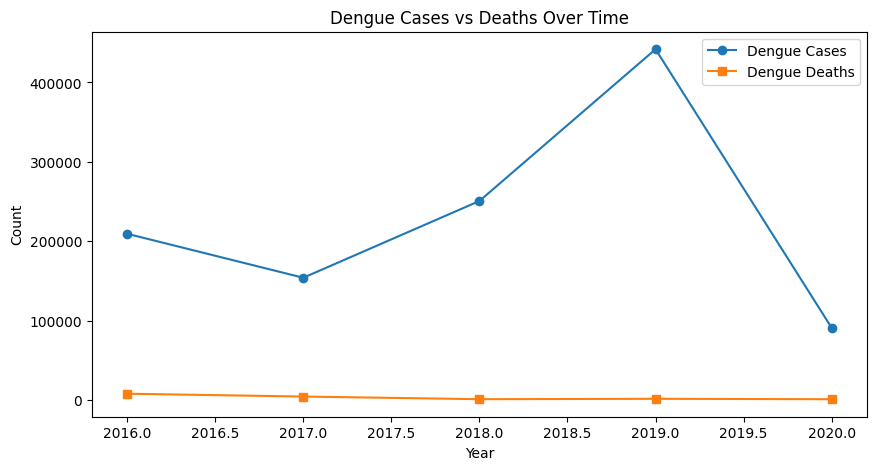

In [38]:
plt.figure(figsize=(10,5))
plt.plot(df.groupby('Year')['Dengue_Cases'].sum(), label='Dengue Cases', marker='o')
plt.plot(df.groupby('Year')['Dengue_Deaths'].sum(), label='Dengue Deaths', marker='s')
plt.title("Dengue Cases vs Deaths Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.show()

<h3>Insight: We can easily see how deaths rise and fall with total cases each year.
It’s a simple way to show that when outbreaks worsen, fatalities usually follow the same pattern.</h3>

<h1>8. Which month tends to have the highest dengue deaths?</h1>

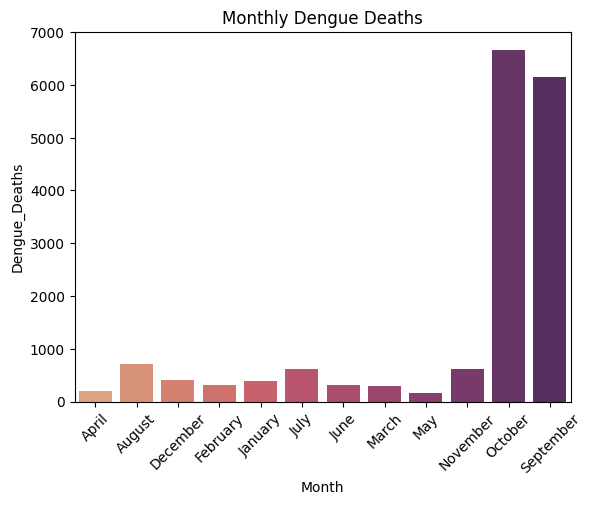

In [40]:
monthly_deaths = df.groupby('Month')['Dengue_Deaths'].sum().reset_index()

sns.barplot(data=monthly_deaths, x='Month', y='Dengue_Deaths', palette='flare')
plt.title("Monthly Dengue Deaths")
plt.xticks(rotation=45)
plt.show()


<h3>Insight: The highest month that has the most dengue deaths are the month of October and September. It's mostly rainy seasons in these months, that explains why there's more dengue cases and deaths.</h3>

<h1>9. What’s the average number of deaths per 1,000 cases per region?</h1>

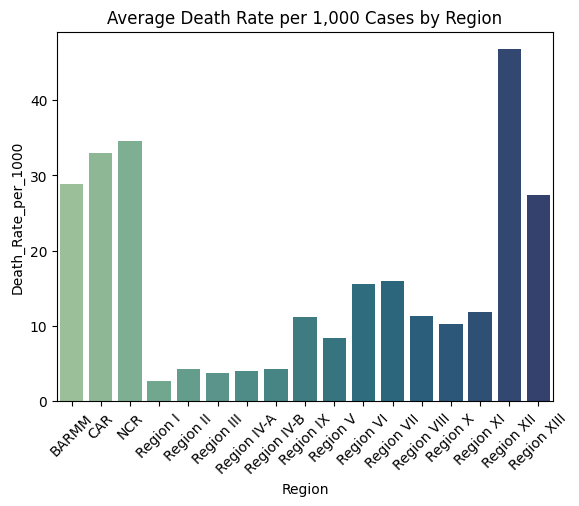

In [41]:
df_region = df.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].sum()
df_region['Death_Rate_per_1000'] = (df_region['Dengue_Deaths'] / df_region['Dengue_Cases']) * 1000
df_region = df_region.reset_index()

sns.barplot(data=df_region, x='Region', y='Death_Rate_per_1000', palette='crest')
plt.title("Average Death Rate per 1,000 Cases by Region")
plt.xticks(rotation=45)
plt.show()


<h3>Insight: This shows not just how many got sick, but how deadly dengue is per region. Some regions have fewer cases but higher death rates — which is something to worry about.</h3>

<h1>10. How have both cases and deaths changed over the years?</h1>

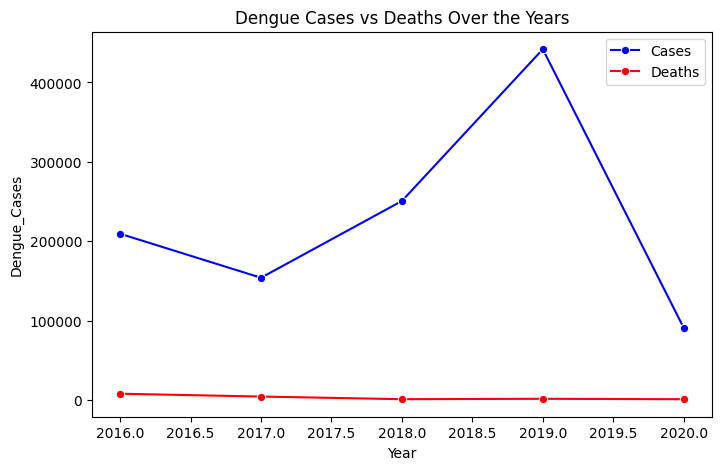

In [42]:
fig, ax1 = plt.subplots(figsize=(8,5))

sns.lineplot(data=yearly_cases, x='Year', y='Dengue_Cases', marker='o', color='blue', label='Cases')
sns.lineplot(data=yearly_deaths, x='Year', y='Dengue_Deaths', marker='o', color='red', label='Deaths')

plt.title("Dengue Cases vs Deaths Over the Years")
plt.legend()
plt.show()

<h3>Insight: Seeing both lines together makes it easy to compare how dengue spreads and kills. Even when cases drop, deaths can still be high — reminding us how dangerous dengue remains.</h3>